# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
import pyttsx3
import speech_recognition as sr
hoangthang=pyttsx3.init()
voices = hoangthang.getProperty('voices')
hoangthang.setProperty('voice', voices[1].id) 
def speak(audio):
    print('hoangthang: ' + audio)
    hoangthang.say(audio)
    hoangthang.runAndWait()


# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_drawing_styles = mp.solutions.drawing_styles
mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):                 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                               mp_drawing_styles.get_default_hand_landmarks_style(),
                               mp_drawing_styles.get_default_hand_connections_style()
                             ) 

In [7]:

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
cap.release()
cv2.destroyAllWindows()

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

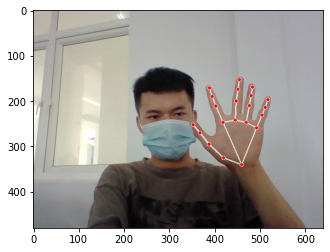

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh,rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test.shape

(126,)

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 7.19556391e-01,  7.10148036e-01,  3.80339287e-07,  6.56752408e-01,
        6.77634001e-01, -1.83748305e-02,  6.07010961e-01,  6.15074217e-01,
       -2.46337280e-02,  5.76418996e-01,  5.63697755e-01, -3.01780086e-02,
        5.53101122e-01,  5.25017381e-01, -3.50325741e-02,  6.55040324e-01,
        5.16086102e-01, -7.02568609e-03,  6.30327821e-01,  4.41607237e-01,
       -1.80447605e-02,  6.17301464e-01,  3.97167087e-01, -2.84734946e-02,
        6.08713508e-01,  3.57827604e-01, -3.68501730e-02,  6.97556376e-01,
        5.06219506e-01, -1.06740175e-02,  7.00982749e-01,  4.18089837e-01,
       -1.83050167e-02,  7.06515491e-01,  3.63648027e-01, -2.80004889e-02,
        7.11465299e-01,  3.19373369e-01, -3.54874209e-02,  7.35922813e-01,
        5.15897691e-01, -1.80909354e-02,  7.45665073e-01,  4.38109785e-01,
       -3.04959547e-02,  7.52637565e-01,  3.92868310e-01, -3.93672287e-02,
        7.57097602e-01,  3.52163613e-01, -4.51760851e-02,  7.70966411e-01,
        5.40225506e-01, -

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['ok', 'hello', 'i love you','Good', 'No', 'Come','Wait','Bed','thank'])

# Thirty videos worth of data
no_sequences = 40

# Videos are going to be 30 frames in length
sequence_length = 40

In [20]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [21]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                    # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'ok': 0,
 'hello': 1,
 'i love you': 2,
 'Good': 3,
 'No': 4,
 'Come': 5,
 'Wait': 6,
 'Bed': 7,
 'thank': 8}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(360, 40, 126)

In [27]:
np.array(labels).shape

(360,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(360, 40, 126)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_test.shape

(18, 9)

In [37]:
print(y.shape,y_test.shape,y_train.shape)

(360, 9) (18, 9) (342, 9)


# 7. Build and Train LSTM Neural Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [29]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [30]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(sequence_length,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [31]:
res = [.7, 0.2, 0.1]

In [32]:
actions[np.argmax(res)]

'ok'

In [33]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
11/11 [==============================] - 4s 96ms/step - loss: 2.1884 - categorical_accuracy: 0.1094
Epoch 2/2000
11/11 [==============================] - 1s 52ms/step - loss: 2.1048 - categorical_accuracy: 0.1633
Epoch 3/2000
11/11 [==============================] - 1s 47ms/step - loss: 1.9655 - categorical_accuracy: 0.2711
Epoch 4/2000
11/11 [==============================] - 1s 60ms/step - loss: 2.0373 - categorical_accuracy: 0.2456
Epoch 5/2000
11/11 [==============================] - 1s 62ms/step - loss: 1.8177 - categorical_accuracy: 0.2579
Epoch 6/2000
11/11 [==============================] - 1s 52ms/step - loss: 1.7057 - categorical_accuracy: 0.3783
Epoch 7/2000
11/11 [==============================] - 1s 53ms/step - loss: 1.8133 - categorical_accuracy: 0.3690
Epoch 8/2000
11/11 [==============================] - 1s 65ms/step - loss: 1.6499 - categorical_accuracy: 0.3712
Epoch 9/2000
11/11 [==============================] - 1s 60ms/step - loss: 1.7506 - categorical_

11/11 [==============================] - 1s 73ms/step - loss: 0.0159 - categorical_accuracy: 0.9973
Epoch 144/2000
11/11 [==============================] - 1s 65ms/step - loss: 0.0528 - categorical_accuracy: 0.9762
Epoch 145/2000
11/11 [==============================] - 1s 70ms/step - loss: 0.5462 - categorical_accuracy: 0.8809
Epoch 146/2000
11/11 [==============================] - 1s 63ms/step - loss: 0.3163 - categorical_accuracy: 0.8977
Epoch 147/2000
11/11 [==============================] - 1s 57ms/step - loss: 0.2536 - categorical_accuracy: 0.9135
Epoch 148/2000
11/11 [==============================] - 1s 57ms/step - loss: 0.1536 - categorical_accuracy: 0.9657
Epoch 149/2000
11/11 [==============================] - 1s 56ms/step - loss: 0.1037 - categorical_accuracy: 0.9791
Epoch 150/2000
11/11 [==============================] - 1s 57ms/step - loss: 0.0515 - categorical_accuracy: 0.9851
Epoch 151/2000
11/11 [==============================] - 1s 61ms/step - loss: 0.0432 - categoric

Epoch 282/2000
11/11 [==============================] - 1s 58ms/step - loss: 6.3368e-05 - categorical_accuracy: 1.0000
Epoch 283/2000
11/11 [==============================] - 1s 58ms/step - loss: 6.5639e-05 - categorical_accuracy: 1.0000
Epoch 284/2000
11/11 [==============================] - 1s 56ms/step - loss: 6.5555e-05 - categorical_accuracy: 1.0000
Epoch 285/2000
11/11 [==============================] - 1s 57ms/step - loss: 6.2745e-05 - categorical_accuracy: 1.0000
Epoch 286/2000
11/11 [==============================] - 1s 58ms/step - loss: 7.2455e-05 - categorical_accuracy: 1.0000
Epoch 287/2000
11/11 [==============================] - 1s 57ms/step - loss: 5.4820e-05 - categorical_accuracy: 1.0000
Epoch 288/2000
11/11 [==============================] - 1s 64ms/step - loss: 5.1648e-05 - categorical_accuracy: 1.0000
Epoch 289/2000
11/11 [==============================] - 1s 59ms/step - loss: 5.4449e-05 - categorical_accuracy: 1.0000
Epoch 290/2000
11/11 [==========================

Epoch 419/2000
11/11 [==============================] - 1s 56ms/step - loss: 1.1308e-05 - categorical_accuracy: 1.0000
Epoch 420/2000
11/11 [==============================] - 1s 59ms/step - loss: 8.8889e-06 - categorical_accuracy: 1.0000
Epoch 421/2000
11/11 [==============================] - 1s 57ms/step - loss: 9.6619e-06 - categorical_accuracy: 1.0000
Epoch 422/2000
11/11 [==============================] - 1s 54ms/step - loss: 1.1963e-05 - categorical_accuracy: 1.0000
Epoch 423/2000
11/11 [==============================] - 1s 59ms/step - loss: 9.8316e-06 - categorical_accuracy: 1.0000
Epoch 424/2000
11/11 [==============================] - 1s 64ms/step - loss: 9.0010e-06 - categorical_accuracy: 1.0000
Epoch 425/2000
11/11 [==============================] - 1s 57ms/step - loss: 1.2368e-05 - categorical_accuracy: 1.0000
Epoch 426/2000
11/11 [==============================] - 1s 56ms/step - loss: 9.1359e-06 - categorical_accuracy: 1.0000
Epoch 427/2000
11/11 [==========================

11/11 [==============================] - 1s 60ms/step - loss: 3.0488e-06 - categorical_accuracy: 1.0000
Epoch 556/2000
11/11 [==============================] - 1s 59ms/step - loss: 3.0183e-06 - categorical_accuracy: 1.0000
Epoch 557/2000
11/11 [==============================] - 1s 60ms/step - loss: 2.6699e-06 - categorical_accuracy: 1.0000
Epoch 558/2000
11/11 [==============================] - 1s 62ms/step - loss: 2.3362e-06 - categorical_accuracy: 1.0000
Epoch 559/2000
11/11 [==============================] - 1s 60ms/step - loss: 3.1846e-06 - categorical_accuracy: 1.0000
Epoch 560/2000
11/11 [==============================] - 1s 61ms/step - loss: 2.8477e-06 - categorical_accuracy: 1.0000
Epoch 561/2000
11/11 [==============================] - 1s 56ms/step - loss: 2.4778e-06 - categorical_accuracy: 1.0000
Epoch 562/2000
11/11 [==============================] - 1s 55ms/step - loss: 3.3655e-06 - categorical_accuracy: 1.0000
Epoch 563/2000
11/11 [==============================] - 1s 60ms

Epoch 624/2000
11/11 [==============================] - 1s 55ms/step - loss: 1.6392e-06 - categorical_accuracy: 1.0000
Epoch 625/2000
11/11 [==============================] - 1s 55ms/step - loss: 1.5893e-06 - categorical_accuracy: 1.0000
Epoch 626/2000
11/11 [==============================] - 1s 56ms/step - loss: 1.7457e-06 - categorical_accuracy: 1.0000
Epoch 627/2000
11/11 [==============================] - 1s 60ms/step - loss: 1.8661e-06 - categorical_accuracy: 1.0000
Epoch 628/2000
11/11 [==============================] - 1s 56ms/step - loss: 1.9241e-06 - categorical_accuracy: 1.0000
Epoch 629/2000
11/11 [==============================] - 1s 81ms/step - loss: 2.0284e-06 - categorical_accuracy: 1.0000
Epoch 630/2000
11/11 [==============================] - 1s 69ms/step - loss: 1.5746e-06 - categorical_accuracy: 1.0000
Epoch 631/2000
11/11 [==============================] - 1s 64ms/step - loss: 1.6654e-06 - categorical_accuracy: 1.0000
Epoch 632/2000
11/11 [==========================

Epoch 761/2000
11/11 [==============================] - 1s 55ms/step - loss: 6.7848e-07 - categorical_accuracy: 1.0000
Epoch 762/2000
11/11 [==============================] - 1s 55ms/step - loss: 6.5133e-07 - categorical_accuracy: 1.0000
Epoch 763/2000
11/11 [==============================] - 1s 62ms/step - loss: 8.4396e-07 - categorical_accuracy: 1.0000
Epoch 764/2000
11/11 [==============================] - 1s 57ms/step - loss: 5.3087e-07 - categorical_accuracy: 1.0000
Epoch 765/2000
11/11 [==============================] - 1s 56ms/step - loss: 4.9435e-07 - categorical_accuracy: 1.0000
Epoch 766/2000
11/11 [==============================] - 1s 57ms/step - loss: 5.5230e-07 - categorical_accuracy: 1.0000
Epoch 767/2000
11/11 [==============================] - 1s 57ms/step - loss: 8.1215e-07 - categorical_accuracy: 1.0000
Epoch 768/2000
11/11 [==============================] - 1s 56ms/step - loss: 6.3996e-07 - categorical_accuracy: 1.0000
Epoch 769/2000
11/11 [==========================

Epoch 898/2000
11/11 [==============================] - 1s 56ms/step - loss: 1.7000e-07 - categorical_accuracy: 1.0000
Epoch 899/2000
11/11 [==============================] - 1s 55ms/step - loss: 2.3213e-07 - categorical_accuracy: 1.0000
Epoch 900/2000
11/11 [==============================] - 1s 59ms/step - loss: 2.5625e-07 - categorical_accuracy: 1.0000
Epoch 901/2000
11/11 [==============================] - 1s 58ms/step - loss: 2.6515e-07 - categorical_accuracy: 1.0000
Epoch 902/2000
11/11 [==============================] - 1s 56ms/step - loss: 1.9196e-07 - categorical_accuracy: 1.0000
Epoch 903/2000
11/11 [==============================] - 1s 62ms/step - loss: 2.1184e-07 - categorical_accuracy: 1.0000
Epoch 904/2000
11/11 [==============================] - 1s 60ms/step - loss: 1.7248e-07 - categorical_accuracy: 1.0000
Epoch 905/2000
11/11 [==============================] - 1s 56ms/step - loss: 1.7385e-07 - categorical_accuracy: 1.0000
Epoch 906/2000
11/11 [==========================

11/11 [==============================] - 1s 71ms/step - loss: 1.0346e-07 - categorical_accuracy: 1.0000
Epoch 1035/2000
11/11 [==============================] - 1s 72ms/step - loss: 9.9176e-08 - categorical_accuracy: 1.0000
Epoch 1036/2000
11/11 [==============================] - 1s 81ms/step - loss: 6.5249e-08 - categorical_accuracy: 1.0000
Epoch 1037/2000
11/11 [==============================] - 1s 73ms/step - loss: 1.0606e-07 - categorical_accuracy: 1.0000
Epoch 1038/2000
11/11 [==============================] - 1s 80ms/step - loss: 9.0926e-08 - categorical_accuracy: 1.0000
Epoch 1039/2000
11/11 [==============================] - 1s 84ms/step - loss: 9.6248e-08 - categorical_accuracy: 1.0000
Epoch 1040/2000
11/11 [==============================] - 1s 84ms/step - loss: 8.6660e-08 - categorical_accuracy: 1.0000
Epoch 1041/2000
11/11 [==============================] - 1s 81ms/step - loss: 1.0664e-07 - categorical_accuracy: 1.0000
Epoch 1042/2000
11/11 [==============================] -

11/11 [==============================] - 1s 73ms/step - loss: 7.1453e-08 - categorical_accuracy: 1.0000
Epoch 1103/2000
11/11 [==============================] - 1s 77ms/step - loss: 3.9612e-08 - categorical_accuracy: 1.0000
Epoch 1104/2000
11/11 [==============================] - 1s 74ms/step - loss: 6.2565e-08 - categorical_accuracy: 1.0000
Epoch 1105/2000
11/11 [==============================] - 1s 83ms/step - loss: 4.4408e-08 - categorical_accuracy: 1.0000
Epoch 1106/2000
11/11 [==============================] - 1s 72ms/step - loss: 5.3301e-08 - categorical_accuracy: 1.0000
Epoch 1107/2000
11/11 [==============================] - 1s 73ms/step - loss: 4.5054e-08 - categorical_accuracy: 1.0000
Epoch 1108/2000
11/11 [==============================] - 1s 74ms/step - loss: 3.8096e-08 - categorical_accuracy: 1.0000
Epoch 1109/2000
11/11 [==============================] - 1s 74ms/step - loss: 4.7040e-08 - categorical_accuracy: 1.0000
Epoch 1110/2000
11/11 [==============================] -

11/11 [==============================] - 1s 56ms/step - loss: 1.5816e-08 - categorical_accuracy: 1.0000
Epoch 1239/2000
11/11 [==============================] - 1s 56ms/step - loss: 1.8861e-08 - categorical_accuracy: 1.0000
Epoch 1240/2000
11/11 [==============================] - 1s 58ms/step - loss: 2.1704e-08 - categorical_accuracy: 1.0000
Epoch 1241/2000
11/11 [==============================] - 1s 65ms/step - loss: 1.8469e-08 - categorical_accuracy: 1.0000
Epoch 1242/2000
11/11 [==============================] - 1s 69ms/step - loss: 2.2409e-08 - categorical_accuracy: 1.0000
Epoch 1243/2000
11/11 [==============================] - 1s 64ms/step - loss: 3.2396e-08 - categorical_accuracy: 1.0000
Epoch 1244/2000
11/11 [==============================] - 1s 59ms/step - loss: 1.4938e-08 - categorical_accuracy: 1.0000
Epoch 1245/2000
11/11 [==============================] - 1s 62ms/step - loss: 2.9828e-08 - categorical_accuracy: 1.0000
Epoch 1246/2000
11/11 [==============================] -

11/11 [==============================] - 1s 100ms/step - loss: 1.1143e-08 - categorical_accuracy: 1.0000
Epoch 1375/2000
11/11 [==============================] - 1s 86ms/step - loss: 8.4343e-09 - categorical_accuracy: 1.0000
Epoch 1376/2000
11/11 [==============================] - 1s 74ms/step - loss: 1.1238e-08 - categorical_accuracy: 1.0000
Epoch 1377/2000
11/11 [==============================] - 1s 77ms/step - loss: 9.8346e-09 - categorical_accuracy: 1.0000
Epoch 1378/2000
11/11 [==============================] - 1s 73ms/step - loss: 9.0715e-09 - categorical_accuracy: 1.0000
Epoch 1379/2000
11/11 [==============================] - 1s 83ms/step - loss: 9.4223e-09 - categorical_accuracy: 1.0000
Epoch 1380/2000
11/11 [==============================] - 1s 85ms/step - loss: 1.1840e-08 - categorical_accuracy: 1.0000
Epoch 1381/2000
11/11 [==============================] - 1s 74ms/step - loss: 7.5390e-09 - categorical_accuracy: 1.0000
Epoch 1382/2000
11/11 [==============================] 

Epoch 1442/2000
11/11 [==============================] - 1s 102ms/step - loss: 6.6188e-09 - categorical_accuracy: 1.0000
Epoch 1443/2000
11/11 [==============================] - 1s 101ms/step - loss: 5.6547e-09 - categorical_accuracy: 1.0000
Epoch 1444/2000
11/11 [==============================] - 1s 99ms/step - loss: 8.9305e-09 - categorical_accuracy: 1.0000
Epoch 1445/2000
11/11 [==============================] - 1s 109ms/step - loss: 8.8031e-09 - categorical_accuracy: 1.0000
Epoch 1446/2000
11/11 [==============================] - 1s 109ms/step - loss: 7.2283e-09 - categorical_accuracy: 1.0000
Epoch 1447/2000
11/11 [==============================] - 1s 112ms/step - loss: 9.2465e-09 - categorical_accuracy: 1.0000
Epoch 1448/2000
11/11 [==============================] - 1s 73ms/step - loss: 5.6296e-09 - categorical_accuracy: 1.0000
Epoch 1449/2000
11/11 [==============================] - 1s 102ms/step - loss: 6.8798e-09 - categorical_accuracy: 1.0000
Epoch 1450/2000
11/11 [===========

Epoch 1578/2000
11/11 [==============================] - 1s 61ms/step - loss: 3.7830e-09 - categorical_accuracy: 1.0000
Epoch 1579/2000
11/11 [==============================] - 1s 57ms/step - loss: 2.3522e-09 - categorical_accuracy: 1.0000
Epoch 1580/2000
11/11 [==============================] - 1s 57ms/step - loss: 2.4950e-09 - categorical_accuracy: 1.0000
Epoch 1581/2000
11/11 [==============================] - 1s 65ms/step - loss: 2.4005e-09 - categorical_accuracy: 1.0000
Epoch 1582/2000
11/11 [==============================] - 1s 65ms/step - loss: 3.1942e-09 - categorical_accuracy: 1.0000
Epoch 1583/2000
11/11 [==============================] - 1s 71ms/step - loss: 3.5936e-09 - categorical_accuracy: 1.0000
Epoch 1584/2000
11/11 [==============================] - 1s 64ms/step - loss: 1.9469e-09 - categorical_accuracy: 1.0000
Epoch 1585/2000
11/11 [==============================] - 1s 75ms/step - loss: 2.7446e-09 - categorical_accuracy: 1.0000
Epoch 1586/2000
11/11 [=================

11/11 [==============================] - 1s 70ms/step - loss: 1.1472e-09 - categorical_accuracy: 1.0000
Epoch 1714/2000
11/11 [==============================] - 1s 71ms/step - loss: 1.1729e-09 - categorical_accuracy: 1.0000
Epoch 1715/2000
11/11 [==============================] - 1s 71ms/step - loss: 2.0799e-09 - categorical_accuracy: 1.0000
Epoch 1716/2000
11/11 [==============================] - 1s 69ms/step - loss: 1.1182e-09 - categorical_accuracy: 1.0000
Epoch 1717/2000
11/11 [==============================] - 1s 73ms/step - loss: 1.0624e-09 - categorical_accuracy: 1.0000
Epoch 1718/2000
11/11 [==============================] - 1s 79ms/step - loss: 1.8234e-09 - categorical_accuracy: 1.0000
Epoch 1719/2000
11/11 [==============================] - 1s 84ms/step - loss: 2.3909e-09 - categorical_accuracy: 1.0000
Epoch 1720/2000
11/11 [==============================] - 1s 92ms/step - loss: 1.4049e-09 - categorical_accuracy: 1.0000
Epoch 1721/2000
11/11 [==============================] -

11/11 [==============================] - 1s 55ms/step - loss: 3.2061e-10 - categorical_accuracy: 1.0000
Epoch 1850/2000
11/11 [==============================] - 1s 61ms/step - loss: 6.9415e-10 - categorical_accuracy: 1.0000
Epoch 1851/2000
11/11 [==============================] - 1s 56ms/step - loss: 7.3408e-10 - categorical_accuracy: 1.0000
Epoch 1852/2000
11/11 [==============================] - 1s 58ms/step - loss: 1.6244e-10 - categorical_accuracy: 1.0000
Epoch 1853/2000
11/11 [==============================] - 1s 60ms/step - loss: 5.8340e-10 - categorical_accuracy: 1.0000
Epoch 1854/2000
11/11 [==============================] - 1s 64ms/step - loss: 3.7871e-10 - categorical_accuracy: 1.0000
Epoch 1855/2000
11/11 [==============================] - 1s 59ms/step - loss: 4.0975e-10 - categorical_accuracy: 1.0000
Epoch 1856/2000
11/11 [==============================] - 1s 59ms/step - loss: 5.9084e-10 - categorical_accuracy: 1.0000
Epoch 1857/2000
11/11 [==============================] -

11/11 [==============================] - 1s 86ms/step - loss: 1.9416e-09 - categorical_accuracy: 1.0000
Epoch 1918/2000
11/11 [==============================] - 1s 99ms/step - loss: 2.5853e-10 - categorical_accuracy: 1.0000
Epoch 1919/2000
11/11 [==============================] - 1s 97ms/step - loss: 6.5692e-10 - categorical_accuracy: 1.0000
Epoch 1920/2000
11/11 [==============================] - 1s 63ms/step - loss: 1.9921e-09 - categorical_accuracy: 1.0000
Epoch 1921/2000
11/11 [==============================] - 1s 61ms/step - loss: 6.3028e-10 - categorical_accuracy: 1.0000
Epoch 1922/2000
11/11 [==============================] - 1s 71ms/step - loss: 1.2363e-10 - categorical_accuracy: 1.0000
Epoch 1923/2000
11/11 [==============================] - 1s 86ms/step - loss: 7.1502e-10 - categorical_accuracy: 1.0000
Epoch 1924/2000
11/11 [==============================] - 1s 65ms/step - loss: 1.2363e-10 - categorical_accuracy: 1.0000
Epoch 1925/2000
11/11 [==============================] -

11/11 [==============================] - 1s 73ms/step - loss: 5.8094e-11 - categorical_accuracy: 1.0000
Epoch 1986/2000
11/11 [==============================] - 1s 73ms/step - loss: 5.6066e-10 - categorical_accuracy: 1.0000
Epoch 1987/2000
11/11 [==============================] - 1s 89ms/step - loss: 7.8056e-10 - categorical_accuracy: 1.0000
Epoch 1988/2000
11/11 [==============================] - 1s 76ms/step - loss: 3.0967e-10 - categorical_accuracy: 1.0000
Epoch 1989/2000
11/11 [==============================] - 1s 80ms/step - loss: 1.5434e-09 - categorical_accuracy: 1.0000
Epoch 1990/2000
11/11 [==============================] - 1s 92ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1991/2000
11/11 [==============================] - 1s 79ms/step - loss: 1.2363e-10 - categorical_accuracy: 1.0000
Epoch 1992/2000
11/11 [==============================] - 1s 79ms/step - loss: 1.0356e-09 - categorical_accuracy: 1.0000
Epoch 1993/2000
11/11 [==============================] -

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 64)            48896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 297       
Total params: 203,657
Trainable params: 203,657
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [44]:
res = model.predict(X_test)

In [45]:
print(X_test.shape)

(18, 40, 126)


In [46]:
actions[np.argmax(res[0])]

'Good'

In [47]:
actions[np.argmax(y_test[0])]

'i love you'

# 9. Save Weights

In [49]:
model.save('action.h5')

In [50]:
del model

In [34]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_test)

In [51]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [52]:
print(len(yhat))
print(len(ytrue))

18
18


In [52]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'multilabel_confusion_matrix' is not defined

In [59]:
accuracy_score(ytrue, yhat)

0.9444444444444444

# 11. Test in Real Time

In [35]:
colors = [(245,117,16), (117,245,16), (16,117,245), (117,245,16), (16,117,245), (117,245,16), (16,117,245),(117,245,16),(117,245,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

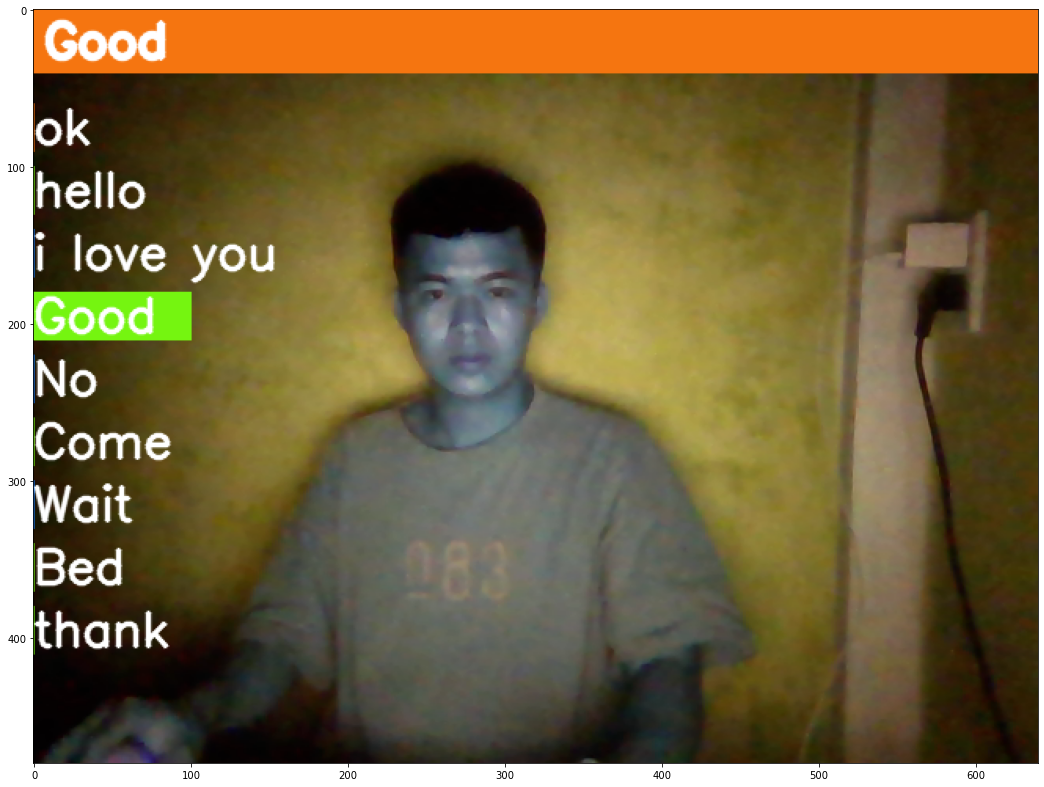

In [60]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [62]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [63]:
len(sequence)

TypeError: object of type 'int' has no len()

In [64]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [65]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [66]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

NameError: name 'handLMS' is not defined

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
#####
# frame_rate = 20
# prev = 0
###
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        time_elapsed = time.time() - prev
        # Read feed
        ret, frame = cap.read()
        h, w, c = frame.shape
        result = hands.process(frame)
        hand_landmarks = result.multi_hand_landmarks
        if hand_landmarks:
            for handLMs in hand_landmarks:
                x_max = 0
                y_max = 0
                x_min = w
                y_min = h
                for lm in handLMs.landmark:
                    x, y = int(lm.x * w), int(lm.y * h)
                    if x > x_max:
                        x_max = x
                    if x < x_min:
                        x_min = x
                    if y > y_max:
                        y_max = y
                    if y < y_min:
                        y_min = y

                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 34), 2)
                cv2.putText(frame,' '.join(sentence), (x_min-10,y_min -10), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,0,238), thickness=2)
    
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        #print(sequence)
        sequence.append(keypoints)
        odx = 0-sequence_length
        
        
        if len(sequence) >= sequence_length:
            sequence = sequence[odx:]
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
         
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 1: 
                sentence = sentence[-1:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1) 
        cv2.putText(image,' '.join(sentence), (7,30),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 4, cv2.LINE_AA)
        #speak(' '.join(sentence))
#         if time_elapsed > 1./frame_rate:
#             prev = time.time()
        # Show to screen
      
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.set(cv2.CAP_PROP_FPS,5)            
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [53]:
cap.release()
cv2.destroyAllWindows()

In [81]:
print(y_test)

[[0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]]


In [82]:
cap.release()
cv2.destroyAllWindows()

In [83]:
res[np.argmax(res)] > threshold

False

https://pawleaks.com/how-to-train-a-deaf-dog/

In [84]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[3.6111175e-19, 3.5227955e-14, 1.8676928e-12, 3.4579124e-08,
        9.9999988e-01, 8.7394085e-08, 2.9024771e-12]], dtype=float32)